#### First import some libraries

In [103]:
import matplotlib.pyplot as plt
import math 
from matplotlib import rcParams
from matplotlib import axes as ax
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import astropy as ap
import matplotlib.colors as colors
from scipy.stats import norm
import scipy.misc as ms
%matplotlib inline

Now read the file coordAa.dat.txt into 6 arrays

In [614]:
x, y, z, vx, vy, vz = np.loadtxt('coordAa.dat.txt', unpack=True)
print(len(x))

39656


Now plot x vs. y and mark each point with a blue dot 'b.':

In [615]:
plt.plot(x, y, 'b.')
plt.show()

The points do not look centered around (0,0) so change the axes limits. Also let us add some axis labels:

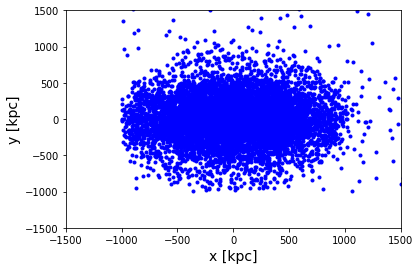

In [616]:
plt.plot(x, y, 'b.')
plt.xlabel('x [kpc]', size=14)
plt.ylabel('y [kpc]', size=14)
plt.axis([-1500., 1500., -1500., 1500])
plt.show()

Now let's do the same thing with y vs. z:

In [617]:
plt.plot(y, z, 'b.')
plt.xlabel('y [kpc]', size=14)
plt.ylabel('z [kpc]', size=14)
plt.axis([-1500., 1500., -1500., 1500])
plt.show()

Now lets make a 3D scatter plot:

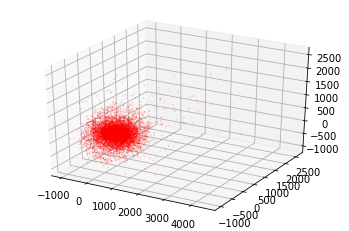

In [618]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)

Now let's center it and add labels on the axes to make it look pretty:

In [619]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)
#Axes3D.scatter(x,y,z)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')

ax.set_xlim3d(-300, 300)
ax.set_ylim3d(-300, 300)
ax.set_zlim3d(-300, 300)
plt.show()

In [620]:
#initializes new arrays to filter out far away particles

x2 = np.array
x2 = x
y2 = np.array
y2 = y
z2 = np.array
z2 = z

#python does not let you delete elements from an array so we will keep track of particles too far away
#and manually make a new array with 300kpc and under on any given axis

goodx2 = []
goody2 = []
goodz2 = []

In [621]:
for i in range(len(x)):
    if ((x2[i] <= 300 and x2[i] >=-300) and (y2[i] <= 300 and y2[i] >=-300) and (z2[i] <= 300 and z2[i] >=-300)):
        goodx2.append(i)
        goody2.append(i)
        goodz2.append(i)

In [622]:
x2 = x[goodx2]
y2 = y[goody2]
z2 = z[goodz2]

In [623]:
#test suite to confirm this worked

for i in range(len(x2)):
    if (x2[i] > 300 or x2[i] <-300):
        print("failed x axis")
        
for i in range(0,len(y2)-1):
    if (y2[i] > 300 or y2[i] < -300):
        print("failed y axis")

for i in range(0,len(z2)-1):
    if (z2[i] > 300 or z2[i] < -300):
        print("failed z axis")
        
#no output so success!

In [624]:
#we redo the 3d plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2, y2, z2, c='r', marker='.', s=0.1)
#Axes3D.scatter(x,y,z)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')

ax.set_xlim3d(-300, 300)
ax.set_ylim3d(-300, 300)
ax.set_zlim3d(-300, 300)
plt.show()

In [625]:
x2.shape

(32813,)

In [626]:
r = np.zeros(32813)
for i in range(len(x2)):
    r[i] = ((x2[i])**2+(y2[i])**2+(z2[i])**2)**(1/2)

In [627]:
goodr = []

for i in range(len(r)):
    if (r[i] <= 300 and r[i] >= 0):
        goodr.append(i)
        
radius = r[goodr]

In [628]:
#find the min and max radii of each particle
large = max(radius)

small = min(radius)

print(large)
print(small)

#if we limit our radius to 300kpc then max = 300 and min = 0

299.97082145558755
0.12655014816269478


In [669]:
#histogram of number of particles vs. radius
plt.title("Number of Particles vs. Radius")
n, bins, patches = plt.hist(radius, 50)
plt.ylabel("Number of Particles [counts]")
plt.xlabel("Radius [kpc]")
plt.show()

In [671]:
mid = []

for i in range(len(bins)-1):
    mid.append((bins[i]+bins[i+1])/2)
print(mid)
#print(bins)

[3.124992861236943, 9.121878287385439, 15.118763713533937, 21.115649139682436, 27.11253456583093, 33.10941999197943, 39.106305418127924, 45.10319084427642, 51.100076270424914, 57.09696169657341, 63.093847122721904, 69.0907325488704, 75.0876179750189, 81.08450340116741, 87.08138882731589, 93.0782742534644, 99.07515967961288, 105.07204510576139, 111.06893053190987, 117.06581595805838, 123.06270138420687, 129.05958681035537, 135.05647223650385, 141.0533576626524, 147.05024308880087, 153.04712851494935, 159.04401394109786, 165.04089936724637, 171.03778479339485, 177.03467021954333, 183.03155564569184, 189.02844107184035, 195.02532649798883, 201.02221192413734, 207.01909735028585, 213.01598277643433, 219.0128682025828, 225.00975362873132, 231.00663905487983, 237.0035244810283, 243.0004099071768, 248.99729533332533, 254.9941807594738, 260.99106618562234, 266.9879516117708, 272.9848370379193, 278.98172246406784, 284.9786078902163, 290.9754933163648, 296.97237874251334]


In [631]:
print(n)

[2957. 3062. 2399. 1807. 1672. 1375. 1187. 1045.  849.  842.  749.  678.
  689.  694.  720.  622.  569.  548.  465.  459.  437.  403.  443.  445.
  453.  398.  459.  373.  362.  328.  326.  315.  283.  259.  272.  255.
  231.  223.  229.  231.  201.  207.  200.  160.  165.  170.  146.  146.
  139.  126.]


In [632]:
volume = []
density = []
bins2 = []

for i in range(len(bins)):
        volume.append((4/3)*np.pi*(bins[i])**3)
        print(volume[i])

0.008489391911404907
961.7762934225948
7458.147625061353
24909.344977292694
58735.590843101076
114357.10771547101
197194.118087387
312666.84445183346
466195.5093017949
663200.335130256
909101.544430201
1209319.3596946145
1569274.0034164814
1994385.6980887854
2490074.6662045117
3061761.130256644
3714865.3127381667
4454807.436142066
5287007.722961324
6216886.395688928
7249863.6768178595
8391359.788841106
9646794.954251647
11021589.395542476
12521163.335206572
14150936.995736912
15916330.599626496
17822764.36936829
19875658.5274553
22080433.29638049
24442508.898636863
26967305.55671738
29660243.493115056
32526742.93032286
35572224.09083376
38802107.197140776
42221812.47173685
45836760.13711501
49652370.4157682
53674063.53018945
57907259.70287168
62357379.15630795
67029842.11299121
71930068.79541443
77063479.4260706
82435494.22745274
88051533.42205377
93917017.23236671
100037365.88088459
106417999.5901003
113064338.58250688


In [633]:
for i in range (len(bins)-1):
    density.append(n[i]/(volume[i]-volume[i-1]))
    print(density[i])
    
density[0]=n[0]/volume[0]

-2.6153250771145686e-05
3.1837206310789674
0.36928307781858805
0.10354590367227459
0.04942907370309338
0.024720649081813036
0.014329343788129096
0.009049756015129048
0.005529911960282465
0.004274006976525329
0.003045938660213688
0.002258360315502459
0.001914130049485854
0.0016325121343344078
0.0014525237524186838
0.001088008968397194
0.0008712239413902358
0.000740598463943474
0.0005587597209047718
0.0004936127835404807
0.00042304899438098633
0.0003530454425164025
0.0003528656932714914
0.00032368475361464093
0.0003020858045195637
0.00024420568919397554
0.0002599986762094941
0.00019565326942908655
0.00017633641684544008
0.00014876803046866204
0.00013801421075963384
0.0001247625225547785
0.00010508968520030846
9.035410809369858e-05
8.931265230823823e-05
7.89502256295467e-05
6.754968087923459e-05
6.16883066208019e-05
6.001661157093617e-05
5.74384950387351e-05
4.7481853379982295e-05
4.651560529238374e-05
4.280397765677951e-05
3.26515507076252e-05
3.214237314557265e-05
3.164548242798243e-05


In [634]:
#log scale of histogram and 3d plot, steps 4 and 5 with log scale. How did you get it to switch to log scale?

log_r = np.log10(radius)

In [635]:
#histogram of number of particles vs. radius
plt.title("Number of Particles vs. Log of Radius")
n, bins, patches = plt.hist(log_r, 50)
plt.ylabel("Number of Particles [counts]")
plt.xlabel("Log of Radius [kpc]")
plt.show()

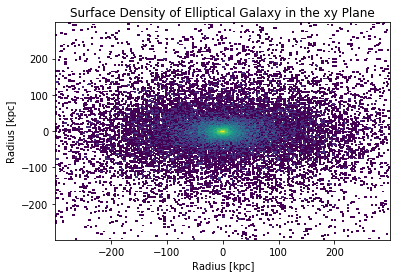

In [636]:
plt.hist2d(x2,y2, bins = 250, norm = colors.LogNorm())
plt.title("Surface Density of Elliptical Galaxy in the xy Plane")
plt.xlabel("Radius [kpc]")
plt.ylabel("Radius [kpc]")
plt.show()

In [637]:
plt.hist2d(x2,z2, bins = 250, norm = colors.LogNorm())
plt.title("Surface Density of Elliptical Galaxy in the xz Plane")
plt.xlabel("Radius [kpc]")
plt.ylabel("Radius [kpc]")
plt.show()

In [638]:
plt.hist2d(y2,z2, bins = 250, norm = colors.LogNorm())
plt.title("Surface Density of Elliptical Galaxy in the yz Plane")
plt.xlabel("Radius [kpc]")
plt.ylabel("Radius [kpc]")
plt.show()

In [639]:
print(len(vx))
print(len(vy))
print(len(vz))
print(len(x))

39656
39656
39656
39656


In [640]:
d_vel = []
for i in range(len(vx)):
    if (((x[i])**2+(y[i])**2+(z[i])**2)**(1/2) <= 300):
        d_vel.append(((vx[i])**2+(vy[i])**2+(vz[i])**2)**(1/2))

In [641]:
print(len(d_vel))
radius.shape

31773


(31773,)

In [642]:
plt.scatter(radius, d_vel, marker = ".")
plt.title("3d Velocity vs. Radius from Galactic Center")
plt.xlabel("Radius [kpc]")
plt.ylabel("3d Velocity [km/s]")
plt.show()

In [694]:
vr = []
mass = 0

for i in range(len(mid)):
    for j in range(len(n)):
        if j <= i:
            mass = mass + n[j]
    vr.append(np.sqrt((2*G*(210000000)*mass)/mid[i]))
    mass = 0

In [646]:
print(len(vr))

31773


In [647]:
print(len(radius))

31773


In [696]:
plt.plot(mid, vr)
plt.title("Escape Velocity vs. Radius from Galactic Center")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity [km/s]")
plt.show()

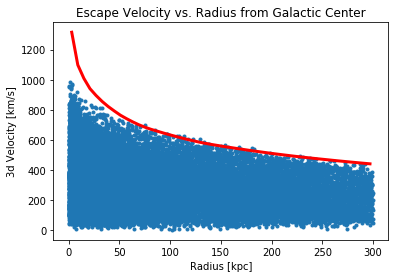

In [702]:
plt.scatter(radius, d_vel, marker = ".")
plt.plot(mid,vr, color = 'r', linewidth = 3)
plt.title("Escape Velocity vs. Radius from Galactic Center")
plt.xlabel("Radius [kpc]")
plt.ylabel("3d Velocity [km/s]")
plt.show()

In [3]:
#plot for ASTRO 404 Hw 4
ZAMS = [0.24,0.69,2.1,4.7,16,81,550,4100,20000,79000,240000,530000,1000000,1800000]
MASS = [0.8,1,25,1.5,2,3,5,9,15,25,40,60,85,120]

In [56]:
log_ZAMS = np.log(ZAMS)
log_MASS = np.log(MASS)

print(log_ZAMS)

[-1.42711636 -0.37106368  0.74193734  1.54756251  2.77258872  4.39444915
  6.30991828  8.31874225  9.90348755 11.27720313 12.3883942  13.18063229
 13.81551056 14.40329722]


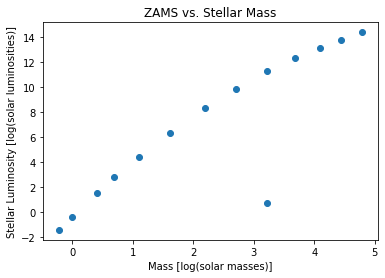

In [57]:
plt.scatter(log_MASS, log_ZAMS)
plt.title("ZAMS vs. Stellar Mass")
plt.xlabel("Mass [log(solar masses)]")
plt.ylabel("Stellar Luminosity [log(solar luminosities)]")
plt.show()

In [6]:
#next, we try to fit a line to this plot
def Power(a,m):
    l = m**a
    return l

In [65]:
lum = []

for i in range(len(MASS)):
    lum.append(Power(3.43,MASS[i]))

In [66]:
log_lum = np.log(lum)

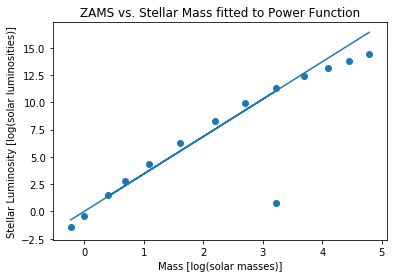

In [70]:
plt.plot(log_MASS,log_lum)
plt.scatter(log_MASS, log_ZAMS)
plt.title("ZAMS vs. Stellar Mass fitted to Power Function")
plt.xlabel("Mass [log(solar masses)]")
plt.ylabel("Stellar Luminosity [log(solar luminosities)]")
plt.show()

In [81]:
nn = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
Sydney_Miranda = [1,0,1,1,1,5,5,1,1,1,3,1,1,3,1,0,3,3,1,0,0,0,0,1,0,0,1,0,1,3]
Bryan = [0,1,1,1,1,5,5,5,2,1,1,1]
Sydnee = [0,0,0,0,0,0,5,0,0,0,0,0,0]
Steph = [2,2,5,5,3,2,2,2,2,3,1,3,5,5,1,1,2,3,2,0,1,10,1,1,3,1,1,5,1,1,1,2,1,0,2,0,1,0,2,0]
Pranav = [5,5,5,2,0,5,6]

In [101]:
def Binomial(p,k,n):
    return (((1-p)**(n-k))*p)*(math.factorial(n))/((math.factorial(k)*math.factorial(n-k)))

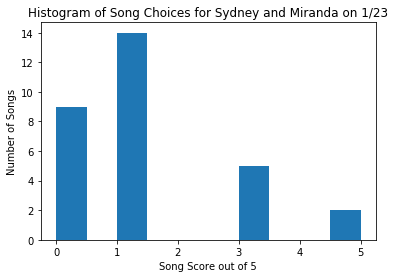

In [26]:
n, bins, patches = plt.hist(Sydney_Miranda)
plt.title("Histogram of Song Choices for Sydney and Miranda on 1/23")
plt.xlabel("Song Score out of 5")
plt.ylabel("Number of Songs")
plt.show()

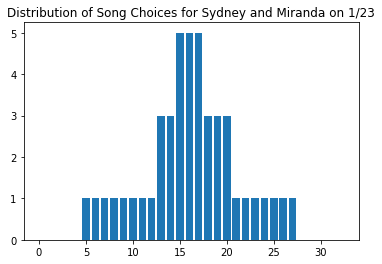

In [107]:
Sydney_Mirandaz = [0,0,0,0,1,1,1,1,1,1,1,1,3,3,5,5,5,3,3,3,1,1,1,1,1,1,1,0,0,0,0,0]
plt.bar(nn, Sydney_Mirandaz)
plt.plot(Binomial(0.75,6,30), 'k')
plt.title("Distribution of Song Choices for Sydney and Miranda on 1/23")
plt.show()

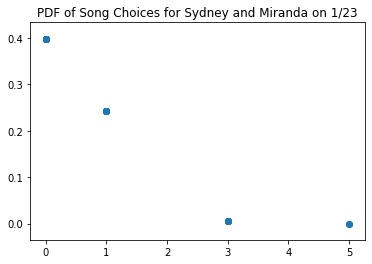

In [62]:
plt.scatter(Sydney_Miranda, norm.pdf(Sydney_Miranda))
plt.title("PDF of Song Choices for Sydney and Miranda on 1/23")
plt.show()

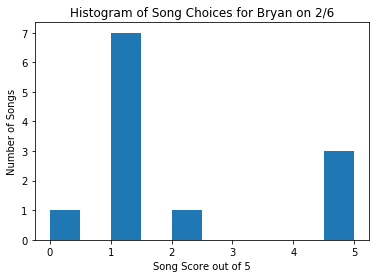

In [31]:
n, bins, patches = plt.hist(Bryan)
plt.title("Histogram of Song Choices for Bryan on 2/6")
plt.xlabel("Song Score out of 5")
plt.ylabel("Number of Songs")
plt.show()

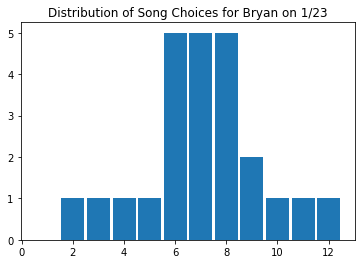

In [79]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], Bryan, width = 0.9)
plt.title("Distribution of Song Choices for Bryan on 1/23")
plt.show()

In [47]:
plt.scatter(Bryan, norm.pdf(Bryan))
plt.show()

In [32]:
n, bins, patches = plt.hist(Sydnee)
plt.title("Histogram of Song Choices for Sydneeeee on 2/6")
plt.xlabel("Song Score out of 5")
plt.ylabel("Number of Songs")
plt.show()

In [83]:
Sydneez = [0,0,0,0,0,0,5,0,0,0,0,0,0,0,0]
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],Sydneez)
plt.title("Distribution of Song Choices for Sydneeeee on 2/6")
plt.show()

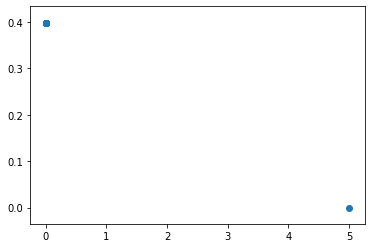

In [48]:
plt.scatter(Sydnee, norm.pdf(Sydnee))
plt.show()

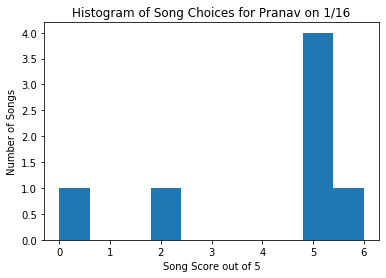

In [39]:
n, bins, patches = plt.hist(Pranav)
plt.title("Histogram of Song Choices for Pranav on 1/16")
plt.xlabel("Song Score out of 5")
plt.ylabel("Number of Songs")
plt.show()

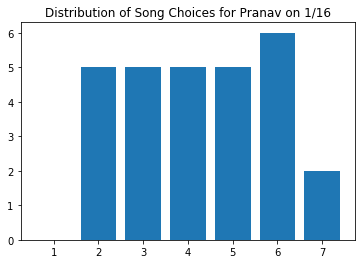

In [85]:
Pranavz = [0,5,5,5,5,6,2]
plt.bar([1,2,3,4,5,6,7], Pranavz)
plt.title("Distribution of Song Choices for Pranav on 1/16")
plt.show()

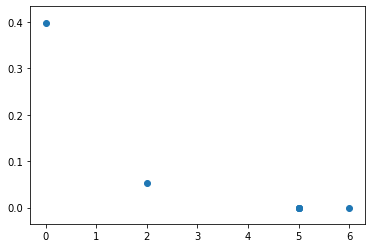

In [50]:
plt.scatter(Pranav, norm.pdf(Pranav))
plt.show()

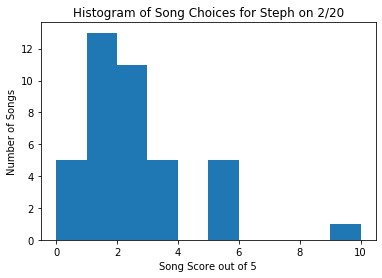

In [38]:
n, bins, patches = plt.hist(Steph)
plt.title("Histogram of Song Choices for Steph on 2/20")
plt.xlabel("Song Score out of 5")
plt.ylabel("Number of Songs")
plt.show()

In [80]:
Stephz = [0,0,0,1,1,1,1,1,1,2,2,2,2,2,3,3,5,5,10,5,5,5,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1,1,0,0]
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40], Stephz, width = 0.8)
plt.title("Distribution of Song Choices for Steph on 1/23")
plt.show()

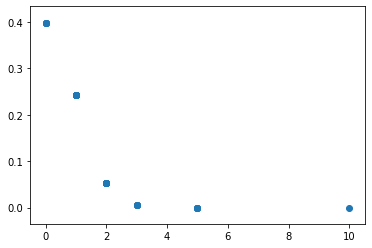

In [51]:
plt.scatter(Steph, norm.pdf(Steph))
plt.show()